In [1]:
import numpy as np
import pandas as pd

In [2]:
filename = './data/housing.data'
df = pd.read_csv(
    filename, 
    delim_whitespace=True, 
    header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACKS', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACKS,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 USD
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in 1000's USD

# Exploratory Data Analysis

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACKS,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

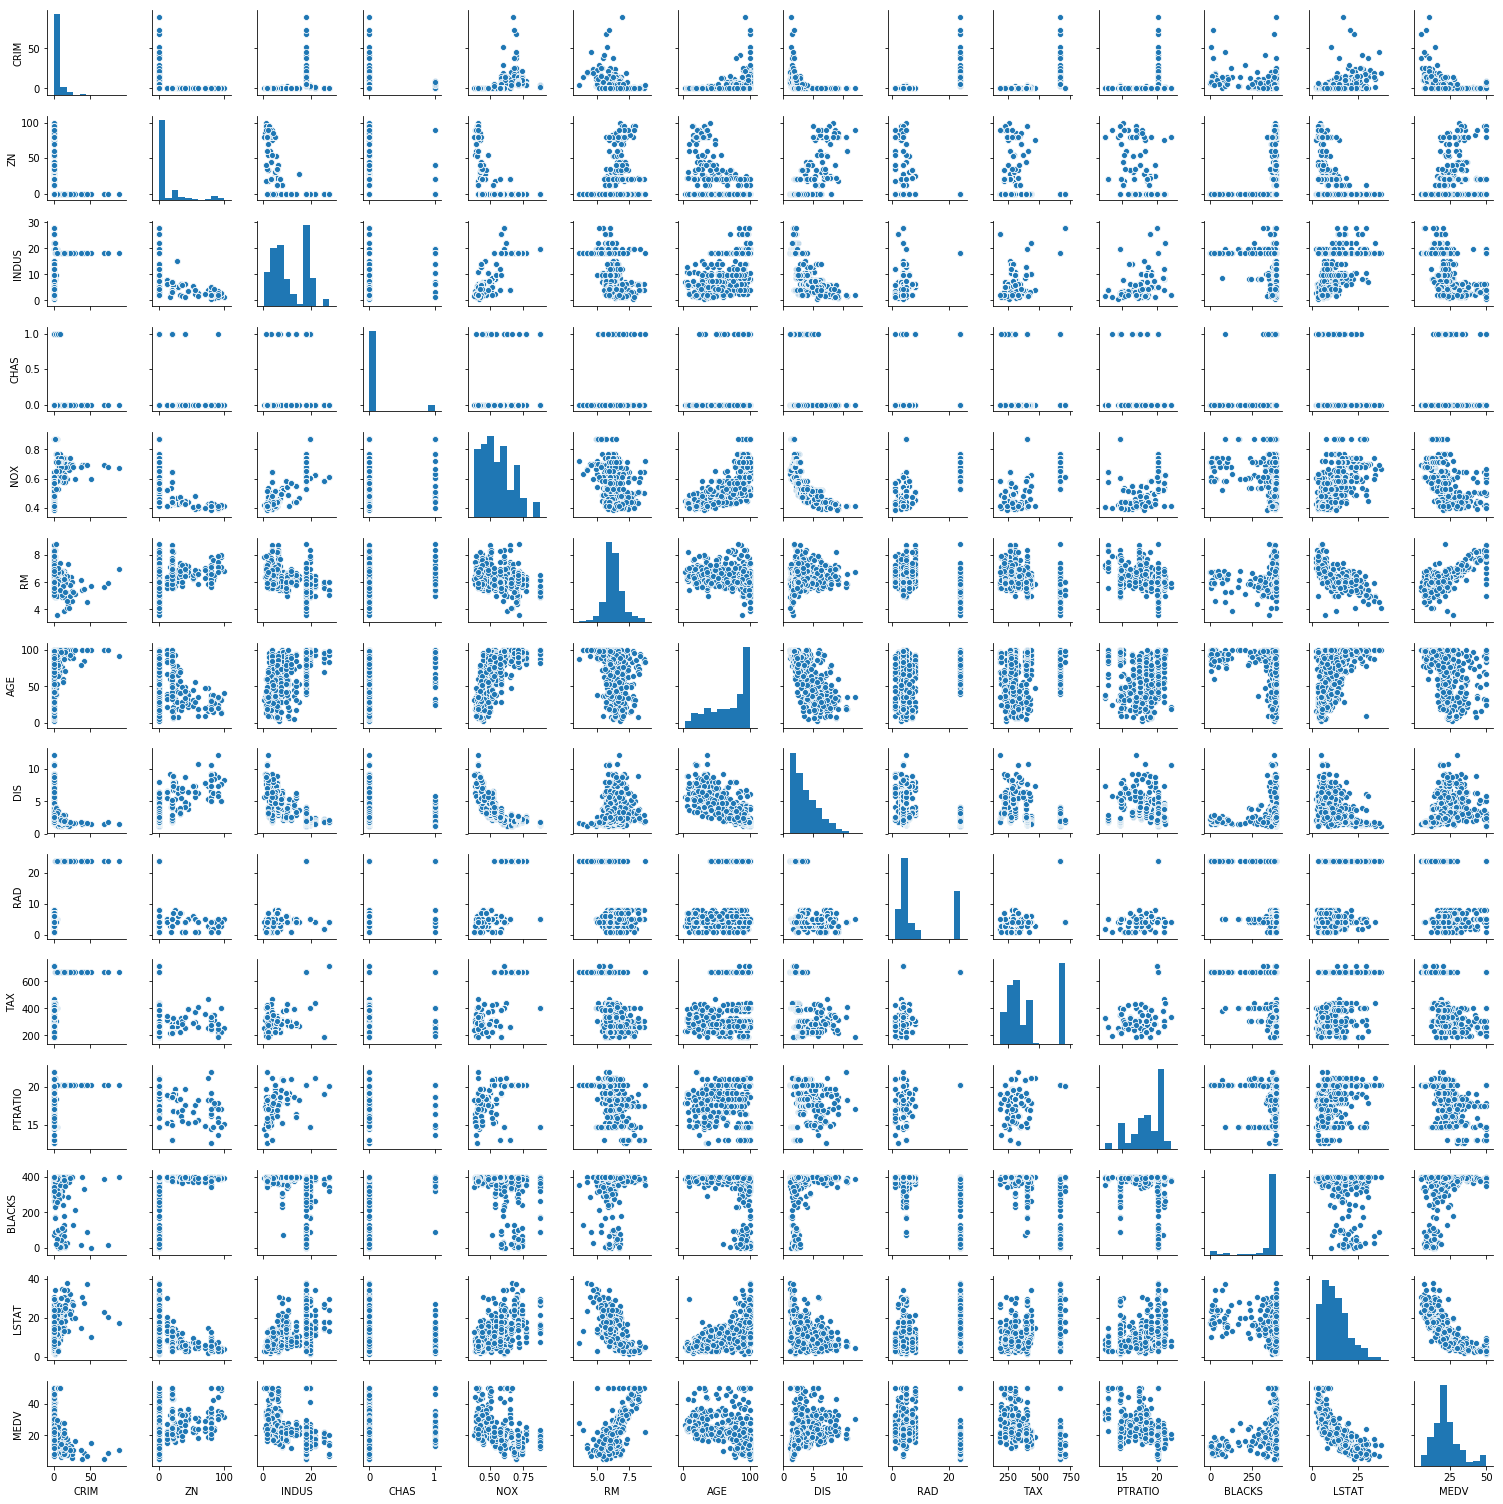

In [5]:
sns.pairplot(df, height=1.5)
plt.show()

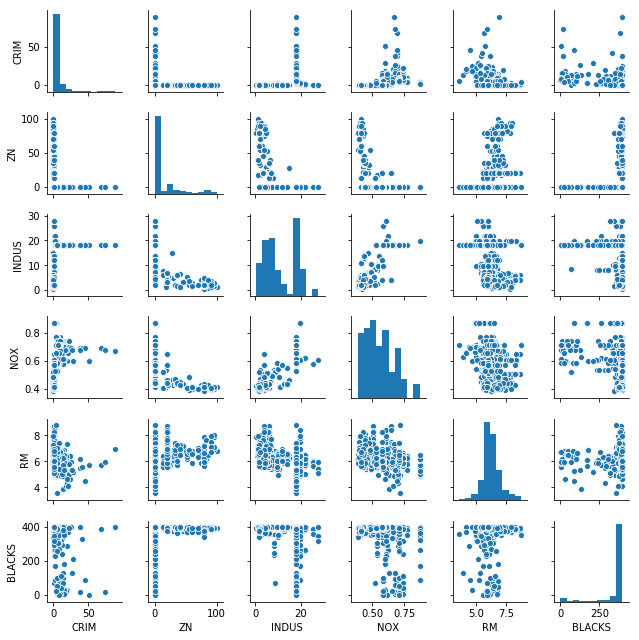

In [6]:
columns_to_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'BLACKS']
sns.pairplot(df[columns_to_study], height=1.5)
plt.show()

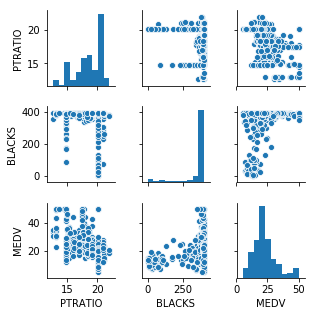

In [7]:
columns_to_study = ['PTRATIO', 'BLACKS', 'MEDV']
sns.pairplot(df[columns_to_study], height=1.5)
plt.show()

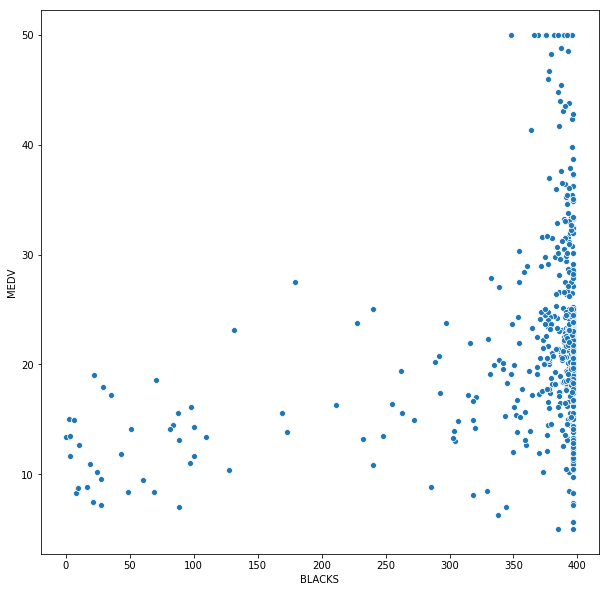

In [8]:
columns_to_study = ['PTRATIO', 'BLACKS', 'MEDV']
plt.figure(figsize=(10,10))
sns.scatterplot(x='BLACKS', y='MEDV', data=df[columns_to_study])
plt.show()

# Correlation Analysis and Feature Selection

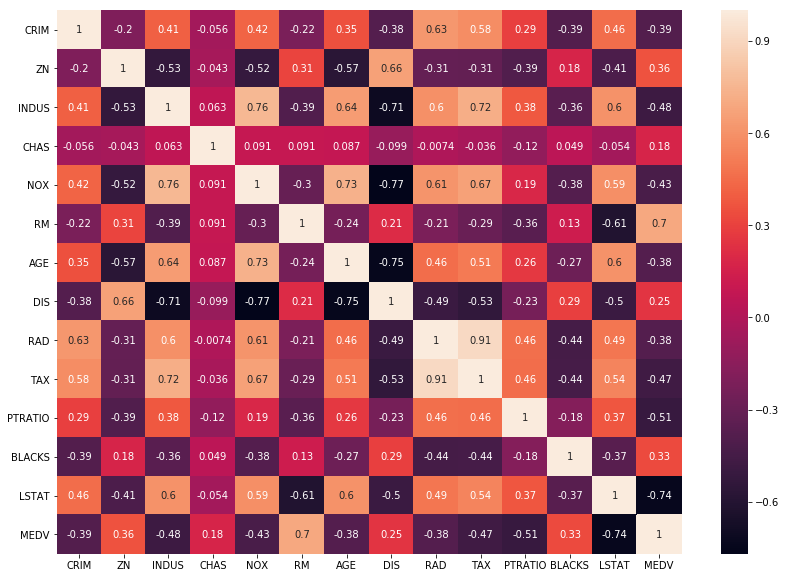

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

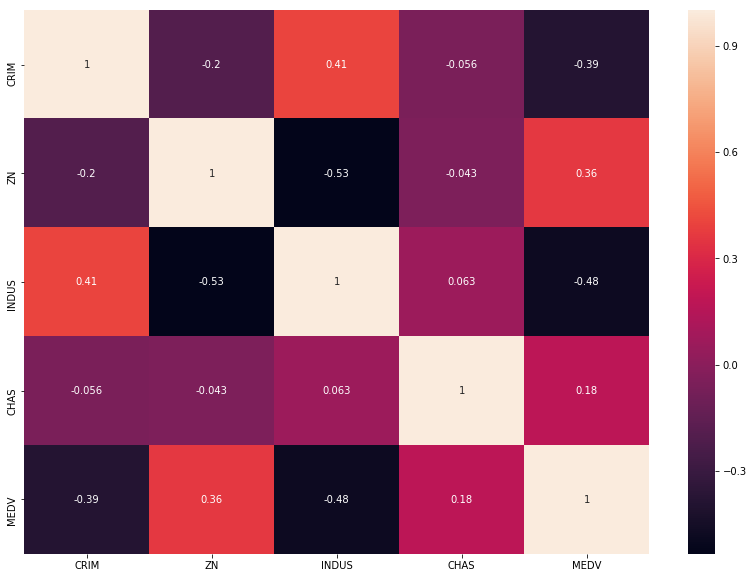

In [10]:
columns_to_study = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']
plt.figure(figsize=(14,10))
sns.heatmap(df[columns_to_study].corr(), annot=True)
plt.show()

# Simple Linear Regression

In [11]:
X = df['RM'].values.reshape(-1,1)

In [12]:
y = df['MEDV'].values

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
model.coef_

array([9.10210898])

In [17]:
model.intercept_

-34.67062077643857

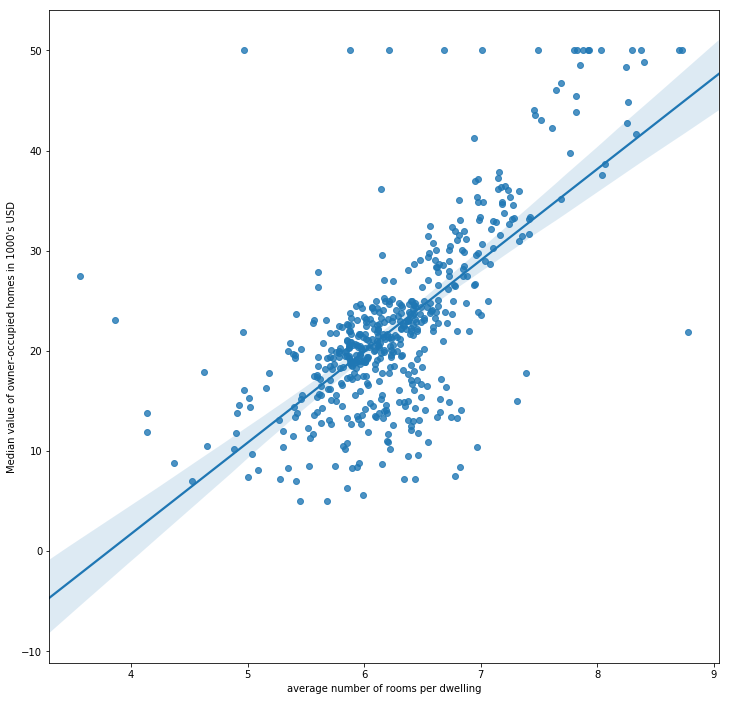

In [18]:
plt.figure(figsize=(12,12))
sns.regplot(X, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in 1000's USD")
plt.show()

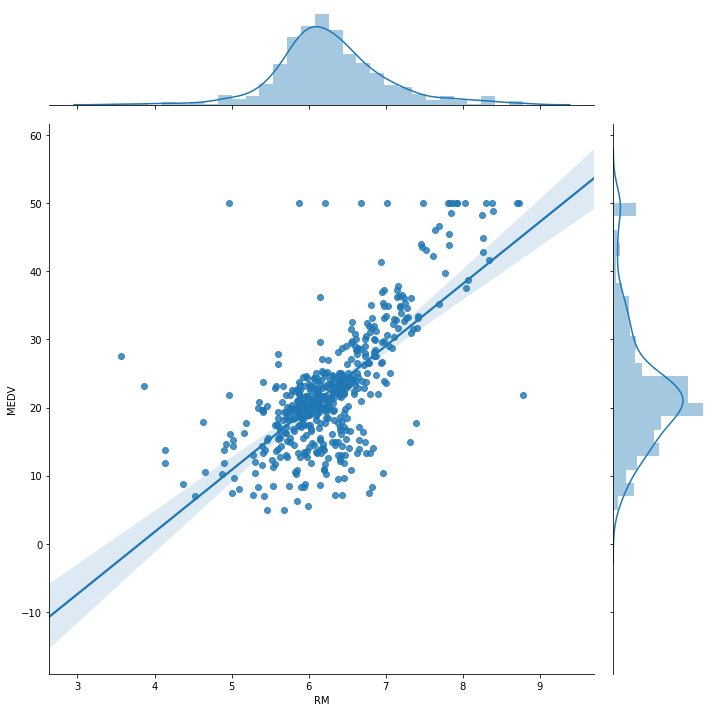

In [19]:
sns.jointplot(x="RM", y="MEDV", data=df, kind='reg', height=10)
plt.show()

In [20]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
model.coef_

array([-0.95004935])

In [22]:
model.intercept_

34.5538408793831

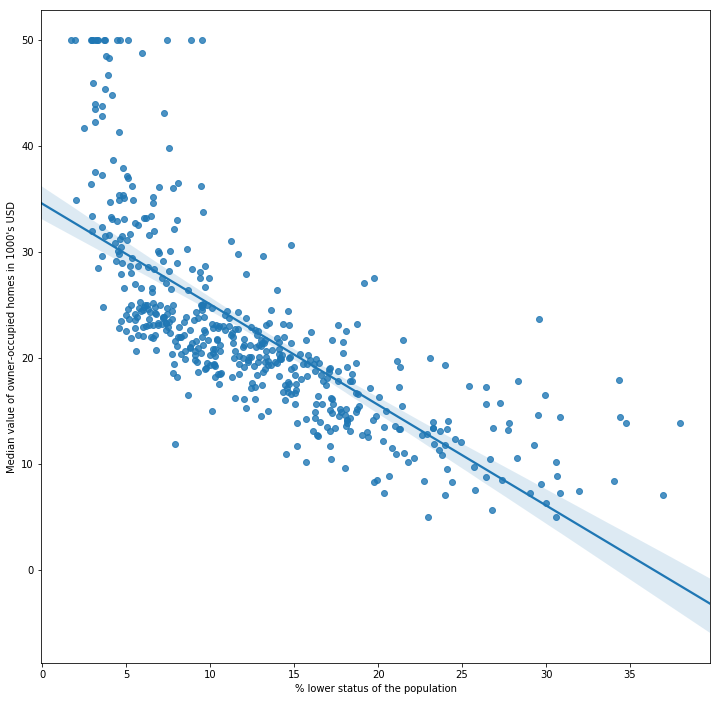

In [23]:
plt.figure(figsize=(12,12))
sns.regplot(X, y)
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in 1000's USD")
plt.show()

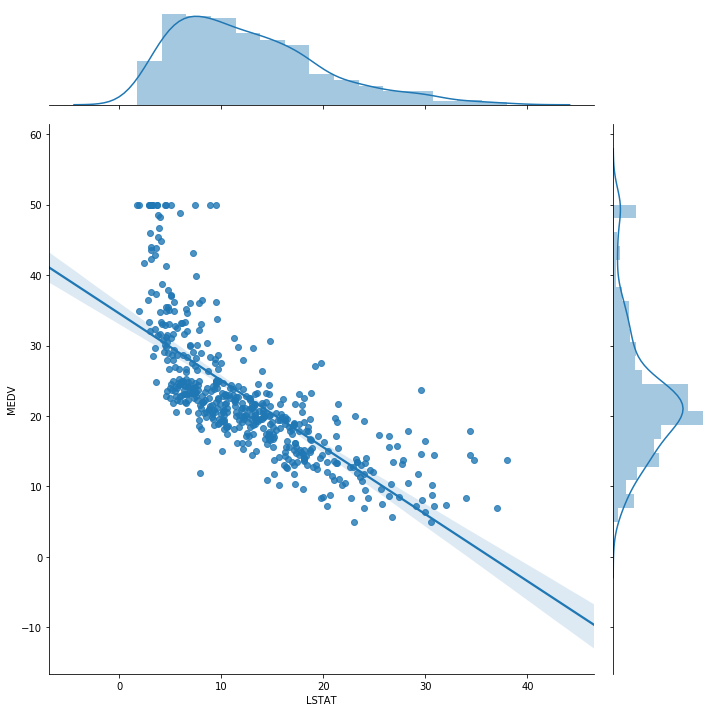

In [24]:
sns.jointplot(x="LSTAT", y="MEDV", data=df, kind='reg', height=10)
plt.show()

# Robust Regression

In [25]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [26]:
from sklearn.linear_model import RANSACRegressor

In [27]:
ransac = RANSACRegressor()

In [28]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [29]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [30]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

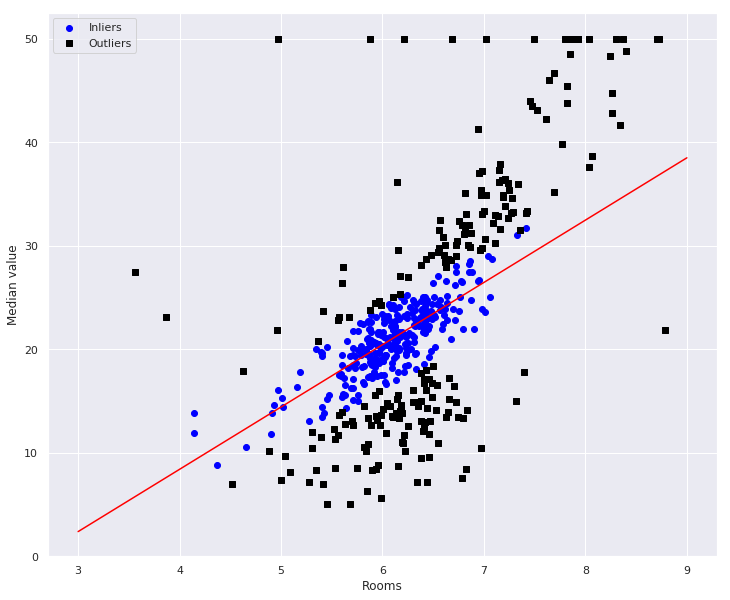

In [31]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12, 10))
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='black', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Rooms')
plt.ylabel('Median value')
plt.legend(loc='upper left')
plt.show()

In [32]:
ransac.estimator_.coef_

array([6.02198204])

In [33]:
ransac.estimator_.intercept_

-15.698228415254317

In [34]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac = RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

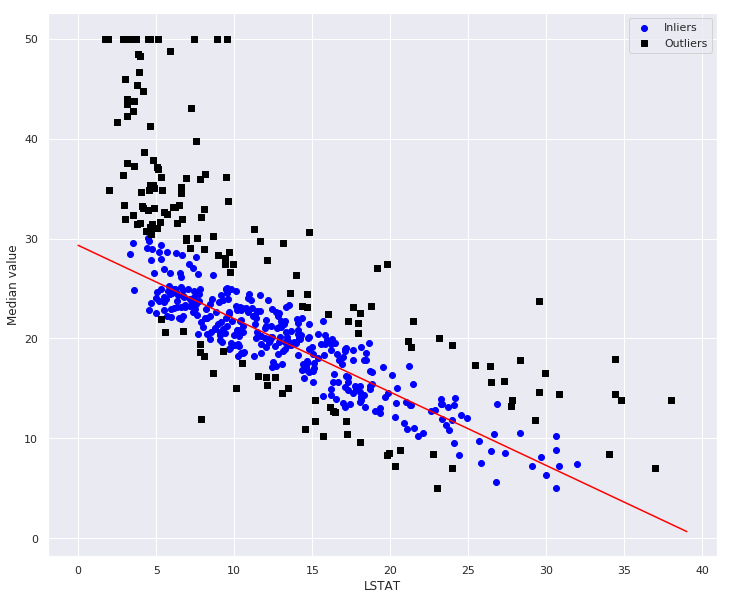

In [35]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12, 10))
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='black', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('LSTAT')
plt.ylabel('Median value')
plt.legend(loc='upper right')
plt.show()

In [36]:
ransac.estimator_.coef_

array([-0.73533466])

In [37]:
ransac.estimator_.intercept_

29.327235091251374

# Performance Evaluation of Regression Model

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
#X = df['LSTAT'].values.reshape(-1, 1)
X = df.iloc[:, :-1].values

In [84]:
y = df['MEDV'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
y_train_predict = lr.predict(X_train)

In [88]:
y_test_predict = lr.predict(X_test)

# Method 1: Residual Analysis

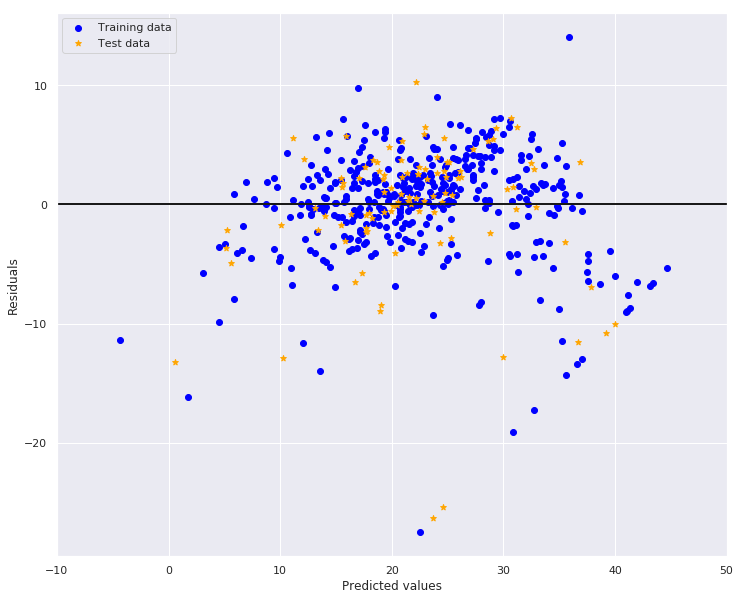

In [89]:
plt.figure(figsize=(12,10))
plt.scatter(y_train_predict, y_train_predict-y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_predict, y_test_predict-y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
mean_squared_error(y_train, y_train_predict)

19.326470203585725

In [92]:
mean_squared_error(y_test, y_test_predict)

33.44897999767649

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y_train, y_train_predict)

0.7730135569264234

In [95]:
r2_score(y_test, y_test_predict)

0.5892223849182514

# What does a Near Perfect Model Looks like?

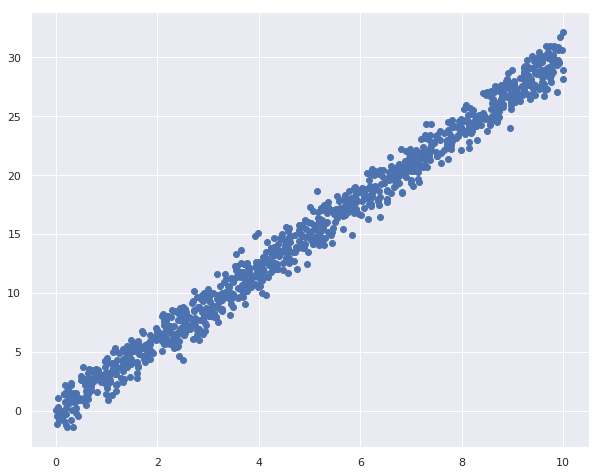

In [72]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

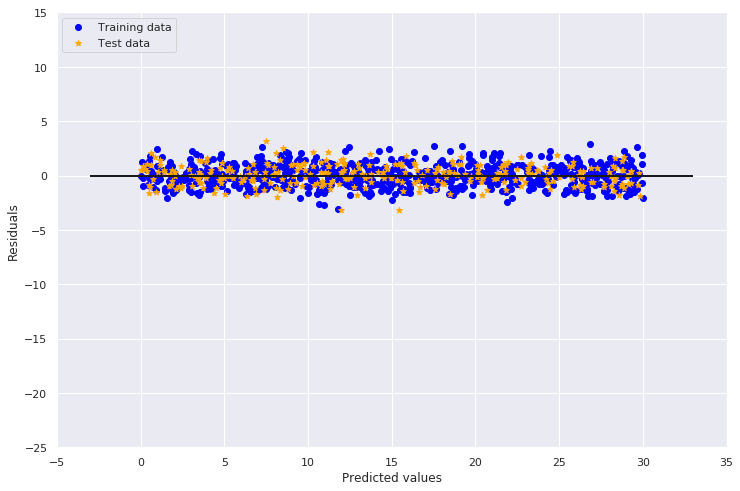

In [76]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

# Method 2: Mean Squared Error (MSE)

In [77]:
mean_squared_error(y_train, y_train_pred)

1.0228325925501265

In [78]:
mean_squared_error(y_test, y_test_pred)

0.9039885923234556

# Method 3: Coefficient of Determination, $R^2$

In [80]:
r2_score(y_train, y_train_pred)

0.9866325181617218

In [81]:
r2_score(y_test, y_test_pred)

0.9884214517939224